In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
from pandas.io import sql
import glob
import sqlalchemy as sqa
from datetime import date


In [2]:
col = list(['origin_airport','destination_airport','flights_count'])

file_path = '/Users/ybatash/PycharmProjects/jupyter/tau-network-science/data/agg/origin_dest_count_2019.csv'

routes_us = pd.read_csv(file_path, low_memory = False, names=col)





In [3]:
graph = nx.from_pandas_edgelist(df = routes_us,
                                source = 'origin_airport', 
                                target = 'destination_airport',
                                edge_attr = 'flights_count')

In [4]:
plt.figure(figsize = (10,9))



<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

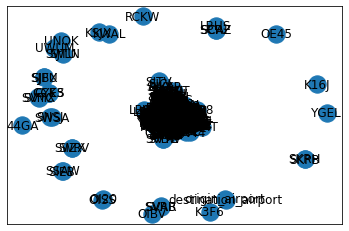

In [5]:
nx.draw_networkx(graph)

In [ ]:
plt.savefig("./map_0.png", format = "png", dpi = 300)
plt.show()

In [32]:
# col = list(['FID','nameshort','namelong','namealt','city','icao','iata','apttype','aptclass','authority','status','dmg','rwpaved','rwlengthm','rwlengthf','elevm','elevf','humuse','humoperatedby','locprecision','latitude','longitude','iso3','iso3_op','country','lastcheckdate','remarks','url_lca','source','createdate','updatedate','geonameid','gdb_geomattr_data','shape','rwwidthm'])

ap_file_path = '/Users/ybatash/PycharmProjects/jupyter/tau-network-science/data/raw_data/airports.csv'

ap = pd.read_csv(ap_file_path, low_memory = False) #, names=col)


In [39]:
# ap
# ap.loc[ap['ident']=="KJFK"]

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,iso_country,iso_region,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords
31995,3622,KJFK,large_airport,John F Kennedy International Airport,40.639801,-73.7789,13.0,NaN,US,US-NY,New York,yes,KJFK,JFK,JFK,https://www.jfkairport.com/,https://en.wikipedia.org/wiki/John_F._Kennedy_...,"Manhattan, New York City, NYC, Idlewild"


In [40]:
from mpl_toolkits.basemap import Basemap as Basemap


ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [22]:

batch_date='20201229'

test_path = '/Users/ybatash/PycharmProjects/fraud_labels_extractor/downloads/FP_Labels_%s_070000/output/BP_labels_file-%s.psv' % (batch_date, batch_date)
prod_path = '~/Downloads/Historical-selected/%s/BP/BP_labels_file-%s.psv' % (batch_date, batch_date)

print(test_path)
print(prod_path)


df_test = pd.read_csv(test_path, low_memory = False, delimiter='|',names=col)
df_prod = pd.read_csv(prod_path, low_memory = False, delimiter='|',names=col)
# df_file

/Users/ybatash/PycharmProjects/fraud_labels_extractor/downloads/FP_Labels_20201229_070000/output/BP_labels_file-20201229.psv
~/Downloads/Historical-selected/20201229/BP/BP_labels_file-20201229.psv


In [23]:
database_username = 'root'
database_password = 'pass'
database_host     = 'localhost'
database_name     = 'metrics'
database_connection = sqa.create_engine('mysql+mysqlconnector://{0}:{1}@{2}/{3}'.
                                               format(database_username, database_password, 
                                                      database_host, database_name))  

In [24]:
df_test.to_sql(con=database_connection, name='BP_table_test',if_exists='append', index= False, chunksize=7000)
df_prod.to_sql(con=database_connection, name='BP_table_prod',if_exists='append', index= False, chunksize=7000)

print("Total number of rows imported to DB :", len(df_test.index))
print("Total number of rows imported to DB :", len(df_prod.index))


Total number of rows imported to DB : 3183
Total number of rows imported to DB : 3183


In [6]:
# fp_df1["RSS_time"] = pd.to_datetime(fp_df1['RSS_time'], format='%Y-%m-%d %H:%M:%S', errors='coerce', utc=True)

# fp_df1["AuthID"] = pd.to_numeric(fp_df1['AuthID'], errors='coerce').fillna(0).astype('int64')
